In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *
import matplotlib.path as mpltPath
from fast_ll2ij_SalishSea201702 import *
from scipy.optimize import curve_fit

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

# 135 particles were released in the domain marked by the black box. All of the particles were released at depths between 30 and 60 m.

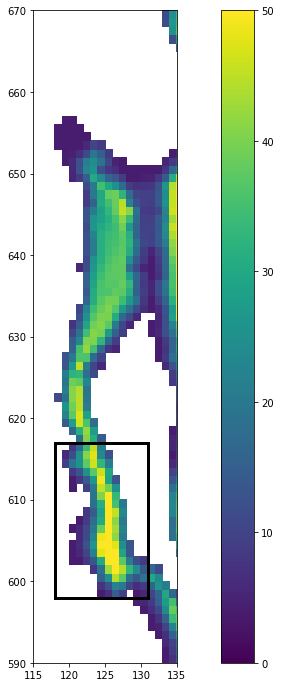

In [3]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
bathy = ax.pcolormesh(grid.variables['Bathymetry'][:], vmin = 0, vmax = 50)
ax.set_ylim(590,670)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((118,598), 13, 19, fill=False, linewidth=3))
fig.colorbar(bathy, ax=ax)

In [15]:
def still_inside(il, ir, jl, jr, lont, latt):
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    for l in range(time):
        cx = lont[l,:]
        cy = latt[l,:]
        pts = np.array([cx,cy]).T
        test = poly.contains_points(pts)
        number_of_particles[l]= sum(test) / particles
    return number_of_particles
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def shallow_particles(lont,latt,init_z, il, ir, jl, jr):
    mask = lont[:].mask
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    index_shallow_particles=[]
    for n in range(particles):
        if init_z[n] < 24:
            index_shallow_particles.append(n)
    number_of_shallow_particles = np.zeros(time)
    for n in range(time):
        for m in index_shallow_particles:
            if (mask[n,m]) == False: 
                tf = poly.contains_point(np.array((lont[n,m], latt[n,m])).T)
                if tf == True:
                    number_of_shallow_particles[n] = number_of_shallow_particles[n] + 1
    return number_of_shallow_particles

In [5]:
Jul = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_bay/Jul16/ariane_trajectories_qualitative.nc')
Jul_latt = Jul.variables['traj_lat']
Jul_lont = Jul.variables['traj_lon']
Oct = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_bay/Oct16/ariane_trajectories_qualitative.nc')
Oct_latt = Oct.variables['traj_lat']
Oct_lont = Oct.variables['traj_lon']
Jan = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_bay/Jan17/ariane_trajectories_qualitative.nc')
Jan_latt = Jan.variables['traj_lat']
Jan_lont = Jan.variables['traj_lon']
Apr = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_bay/Apr17/ariane_trajectories_qualitative.nc')
Apr_latt = Apr.variables['traj_lat']
Apr_lont = Apr.variables['traj_lon']
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc', 'r') as cnc:
    glamf = cnc.variables['glamf'][0,...]; gphif = cnc.variables['gphif'][0,...]
    glamt = cnc.variables['glamt'][0,...]; gphit = cnc.variables['gphit'][0,...]
NY, NX = glamt.shape[0], glamt.shape[1]
glamfe, gphife = expandf(glamf, gphif)

In [6]:
Jul_all = still_inside(118,132,598,617,Jul_lont, Jul_latt)
Oct_all = still_inside( 118,132,598,617,Oct_lont, Oct_latt)
Jan_all = still_inside( 118,132,598,617, Jan_lont, Jan_latt)
Apr_all = still_inside( 118,132,598,617, Apr_lont, Apr_latt)

In [13]:
popt1, pcov1 = curve_fit(func, range(744), Jul_all)
popt2, pcov2 = curve_fit(func, range(744), Oct_all)
popt3, pcov3 = curve_fit(func, range(744), Jan_all)
popt4, pcov4 = curve_fit(func, range(720), Apr_all)
print('July: '+str(1/popt1[1] /24))
print('October: '+str(1/popt2[1] /24))
print('January: '+str(1/popt3[1] /24))
print('April: '+str(1/popt4[1] /24))

July: 8.01982708525
October: 8.5050337479
January: 8.69262968029
April: 5.07240952191


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


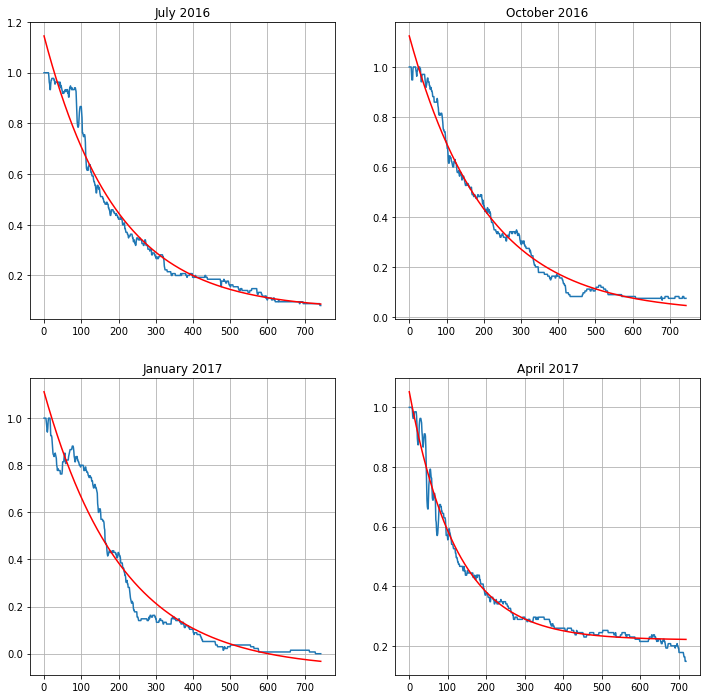

In [9]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_all)
ax[0,0].plot(range(744), func(range(744), *popt1), 'r-')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_all)
ax[0,1].plot(range(744), func(range(744), *popt2), 'r-')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_all)
ax[1,0].plot(range(744), func(range(744), *popt3), 'r-')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_all)
ax[1,1].plot(range(720), func(range(720), *popt4), 'r-')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

# 170 particles were released in the domain marked by the black box. All of the particles were released at depths between 30 and 70 m.

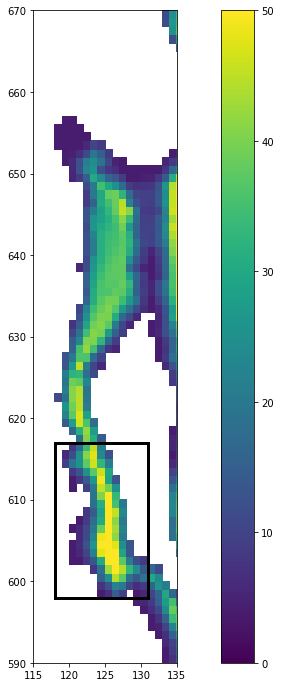

In [16]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
bathy = ax.pcolormesh(grid.variables['Bathymetry'][:], vmin = 0, vmax = 50)
ax.set_ylim(590,670)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((118,598), 13, 19, fill=False, linewidth=3))
fig.colorbar(bathy, ax=ax)

In [17]:
Jul2 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_deep_bay/Jul16/ariane_trajectories_qualitative.nc')
Jul2_latt = Jul.variables['traj_lat']
Jul2_lont = Jul.variables['traj_lon']
Oct2 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_deep_bay/Oct16/ariane_trajectories_qualitative.nc')
Oct2_latt = Oct.variables['traj_lat']
Oct2_lont = Oct.variables['traj_lon']
Jan2 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_deep_bay/Jan17/ariane_trajectories_qualitative.nc')
Jan2_latt = Jan.variables['traj_lat']
Jan2_lont = Jan.variables['traj_lon']
Apr2 = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/deep_deep_deep_bay/Apr17/ariane_trajectories_qualitative.nc')
Apr2_latt = Apr.variables['traj_lat']
Apr2_lont = Apr.variables['traj_lon']
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc', 'r') as cnc:
    glamf = cnc.variables['glamf'][0,...]; gphif = cnc.variables['gphif'][0,...]
    glamt = cnc.variables['glamt'][0,...]; gphit = cnc.variables['gphit'][0,...]
NY, NX = glamt.shape[0], glamt.shape[1]
glamfe, gphife = expandf(glamf, gphif)

In [18]:
Jul2_all = still_inside(118,132,598,617,Jul2_lont, Jul2_latt)
Oct2_all = still_inside( 118,132,598,617,Oct2_lont, Oct2_latt)
Jan2_all = still_inside( 118,132,598,617, Jan2_lont, Jan2_latt)
Apr2_all = still_inside( 118,132,598,617, Apr2_lont, Apr2_latt)

In [19]:
popt12, pcov12 = curve_fit(func, range(744), Jul2_all)
popt22, pcov22 = curve_fit(func, range(744), Oct2_all)
popt32, pcov32 = curve_fit(func, range(744), Jan2_all)
popt42, pcov42 = curve_fit(func, range(720), Apr2_all)
print('July: '+str(1/popt12[1] /24))
print('October: '+str(1/popt22[1] /24))
print('January: '+str(1/popt32[1] /24))
print('April: '+str(1/popt42[1] /24))

July: 8.01982708525
October: 8.5050337479
January: 8.69262968029
April: 5.07240952191


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


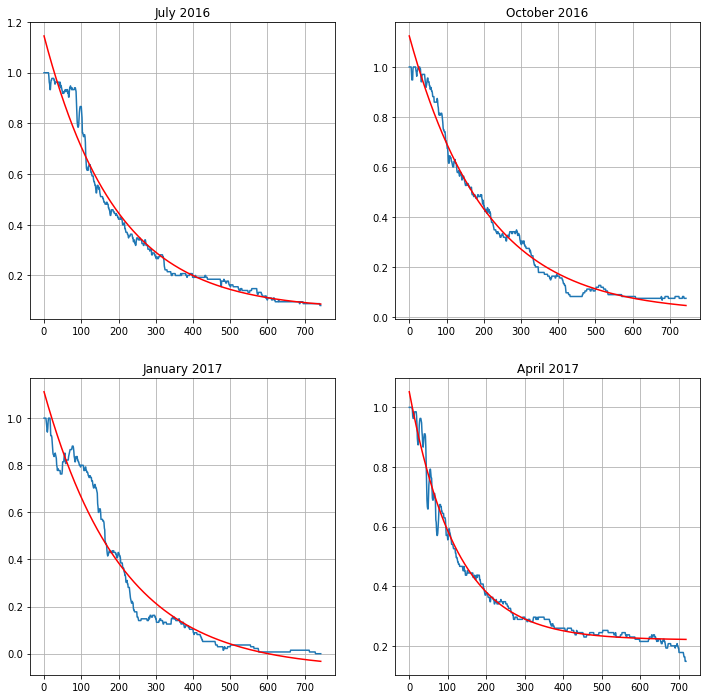

In [20]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul2_all)
ax[0,0].plot(range(744), func(range(744), *popt12), 'r-')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct2_all)
ax[0,1].plot(range(744), func(range(744), *popt22), 'r-')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan2_all)
ax[1,0].plot(range(744), func(range(744), *popt32), 'r-')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr2_all)
ax[1,1].plot(range(720), func(range(720), *popt42), 'r-')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')